# feature_extraction.ipynb

This notebook demonstrates the feature extraction code used to estimate the ground state 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import feature_extraction as ffit
import backus_utils as utils

In [2]:
path_to_coeffs = 
path_to_gen2l = 

In [3]:
Nt = 

t1 =
t2 =

wmin =
wmax = 

channel = 

# Fetch Gen-2L correlator data

In [4]:
mean, std, cov = utils.get_sample(path_to_gen2l,channel,n_samples=-1,Nt=32,t1=1,t2=t2)
mean

array([3.02927516e+00, 2.08978915e+00, 1.47022468e+00, 1.04305115e+00,
       7.43093576e-01, 5.30825501e-01, 3.79676747e-01, 2.71918094e-01,
       1.94835304e-01, 1.39735851e-01, 1.00250391e-01, 7.19484264e-02,
       5.16500666e-02, 3.70832718e-02, 2.66337832e-02, 1.91337059e-02,
       1.37462046e-02, 9.87648257e-03, 7.09784416e-03, 5.10153963e-03,
       3.66697778e-03, 2.63611613e-03, 1.89514656e-03, 1.36255206e-03,
       9.79793655e-04, 7.04678838e-04, 5.06821713e-04, 3.64557645e-04,
       2.62392898e-04, 1.88849681e-04, 1.36014516e-04])

# Fetch coefficient data

In [5]:
coeffs = pd.read_csv(path_to_coeffs,header=None).values[:]
coeffs

array([[ -5.5381734 ,   1.80413695,  14.538364  , ..., -31.08803497,
         51.04348438, 179.74861244],
       [ -5.49565069,  16.67088411,  -7.95644593, ...,   9.09327729,
         -0.43393765, -17.66614751],
       [ -5.8652526 ,  21.25531578, -16.7403498 , ...,  13.74885697,
        -18.3512847 , -68.55358418],
       ...,
       [ -8.9303683 ,  42.1921258 , -27.36285471, ...,   0.81330398,
         -1.19660581,  -4.00047211],
       [ -8.89191506,  42.16925224, -27.80998293, ...,   0.78060151,
         -1.20202538,  -3.95837409],
       [ -8.85334446,  42.13384028, -28.23279193, ...,   0.74894181,
         -1.20597143,  -3.91473869]])

Text(0.5, 0, '$\\omega$')

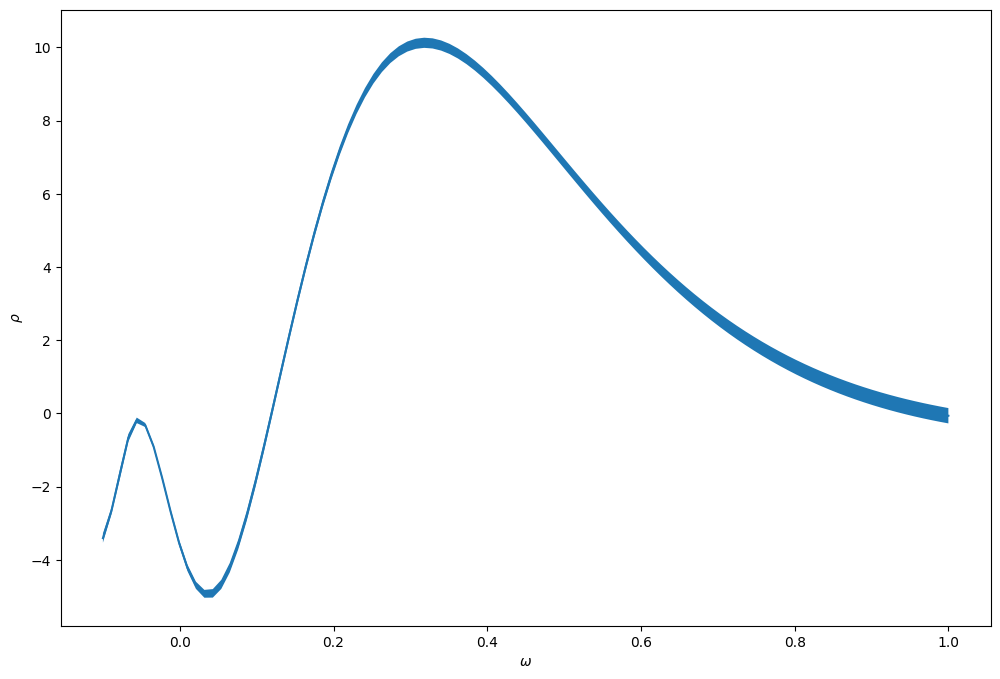

In [6]:
w = np.linspace(wmin,wmax,coeffs.shape[0])
rho = np.matmul(coeffs,mean)
rho_err = np.sqrt(np.diag(np.matmul(np.matmul(coeffs,cov),coeffs.T)))

fig = plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(w,rho)
ax.fill_between(w,rho+rho_err,rho-rho_err)
ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$\omega$")

# Fit ground state feature (fit full peak)

In [7]:
mu, mu_err, fwhm, fwhm_err, _ = ffit.main(rho,rho_err,w,channel=channel,Nt=Nt,gen2l_path=path_to_gen2l,method="full")
print(mu, mu_err, fwhm, fwhm_err)

0.345002216470323 0.0009262584035456243 0.42206183790985186 0.0036326629895767587


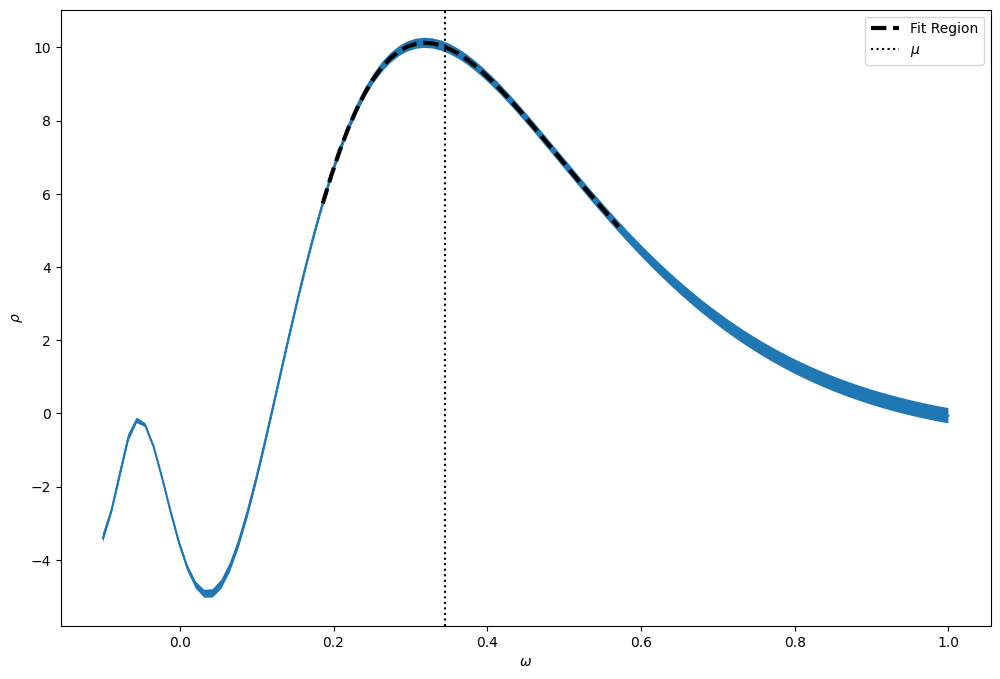

In [8]:
w = np.linspace(wmin,wmax,coeffs.shape[0])
rho = np.matmul(coeffs,mean)
rho_err = np.sqrt(np.diag(np.matmul(np.matmul(coeffs,cov),coeffs.T)))

fig = plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(w,rho,ls='-')
ax.fill_between(w,rho+rho_err,rho-rho_err)

# Plot fit features

popt,pcov,mask = ffit.main(rho,rho_err,w,channel=channel,Nt=Nt,gen2l_path=path_to_gen2l,method="full",return_popt=True,return_info=True)

A, mu, sigma = popt

ax.plot(w[mask],rho[mask],c='k',ls='--',lw=3,label='Fit Region')
ax.axvline(mu,ls=':',c='k',label="$\mu$")

ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$\omega$")
ax.legend()

# Plot leading and trailing fits

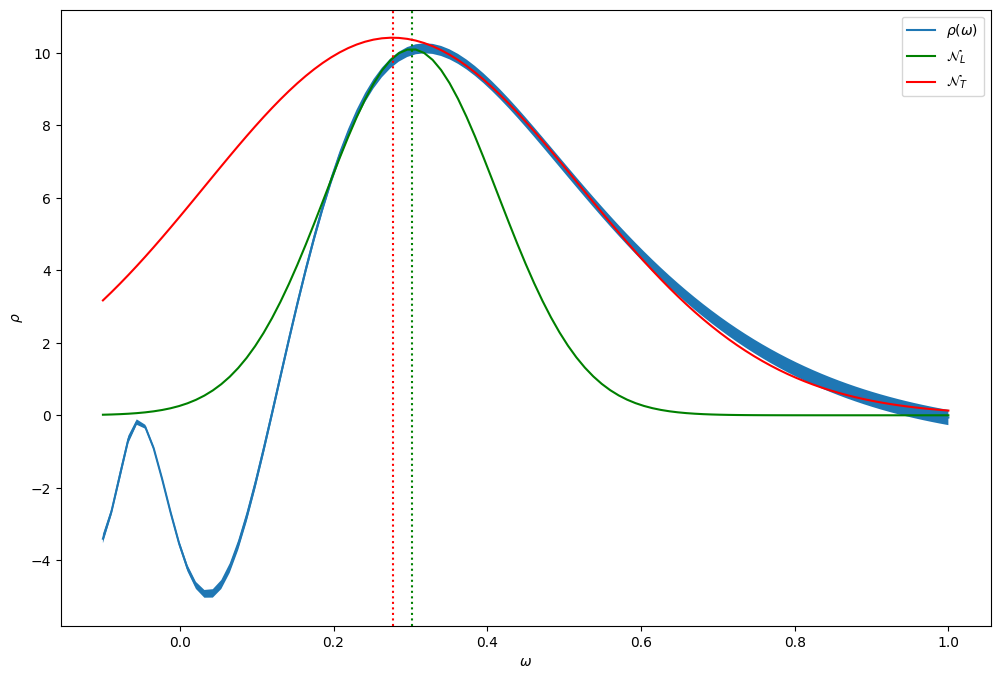

In [9]:
w = np.linspace(wmin,wmax,coeffs.shape[0])
rho = np.matmul(coeffs,mean)
rho_err = np.sqrt(np.diag(np.matmul(np.matmul(coeffs,cov),coeffs.T)))

fig = plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(w,rho, label=r'$\rho(\omega)$')
ax.fill_between(w,rho+rho_err,rho-rho_err)

ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$\omega$")

c = ["g","r"]
label = ["$\mathcal{N}_L$","$\mathcal{N}_T$"]

for pos, method in enumerate(["leading","trailing"]):

    popt,pcov = ffit.main(rho,rho_err,w,channel=channel,Nt=Nt,gen2l_path=path_to_gen2l,method=method,return_popt=True)
    
    A, mu, sigma = popt
    
    plt.plot(w,ffit.normal(w,*popt), c=c[pos], label=label[pos])
    
    ax.axvline(mu,ls=':',c=c[pos])
    
ax.legend()